In [1]:
from IPython.display import display, HTML # type:ignore
style = "<style> body { font-family: Oswald; font-size: 16px; } </style>"
display(HTML(style))

Loading the dataset 

In [21]:
import pandas as pd
housing_df = pd.read_csv("./datasets/housing.csv")
housing_df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0    -122.23     37.88                41.0        880.0           129.0  \
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [22]:
housing_df['latitude']

0        37.88
1        37.86
2        37.85
3        37.85
4        37.85
         ...  
20635    39.48
20636    39.49
20637    39.43
20638    39.43
20639    39.37
Name: latitude, Length: 20640, dtype: float64

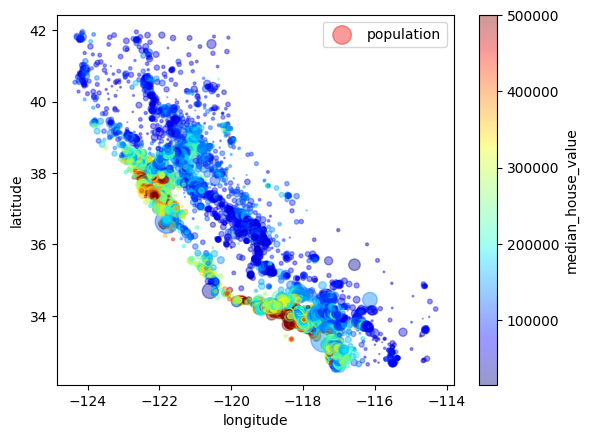

In [23]:
from matplotlib import pyplot as plt


housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing_df["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()


<Axes: xlabel='longitude', ylabel='latitude'>

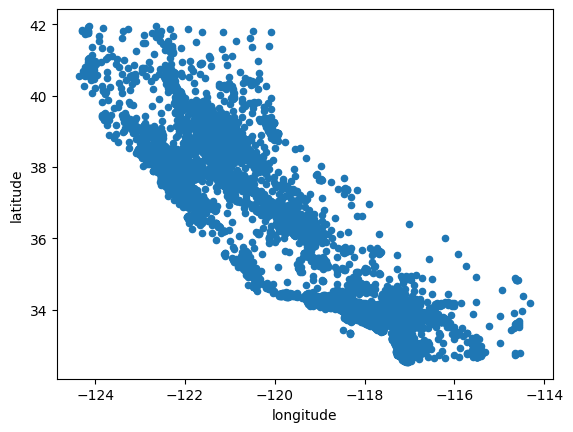

In [24]:
housing_df.plot(kind="scatter", x="longitude", y="latitude")


In [25]:
housing_df["ocean_proximity"].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [30]:
#converting the ocean_proximity to encoded numerical type for correlation to work
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
housing_df['ocean_proximity'] = label_encoder.fit_transform(housing_df['ocean_proximity'])

# Print the mappings
print(label_encoder.classes_)
housing_df.head()

[0 1 2 3 4]


longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0    -122.23     37.88                41.0        880.0           129.0  \
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_proximity  
0       322.0       126.0         8.3252            452600.0                3  
1      2401.0      1138.0         8.3014            358500.0                3  
2       496.0       177.0         7.2574            352100.0                3  
3       558.0       219.0         5.6431            341300.0                3  
4       565.0       259.0         3.8462            342200.0                3

In [27]:

#computing the correlation btwn the attributes
corr_matrix = housing_df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


ValueError: could not convert string to float: 'NEAR BAY'

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

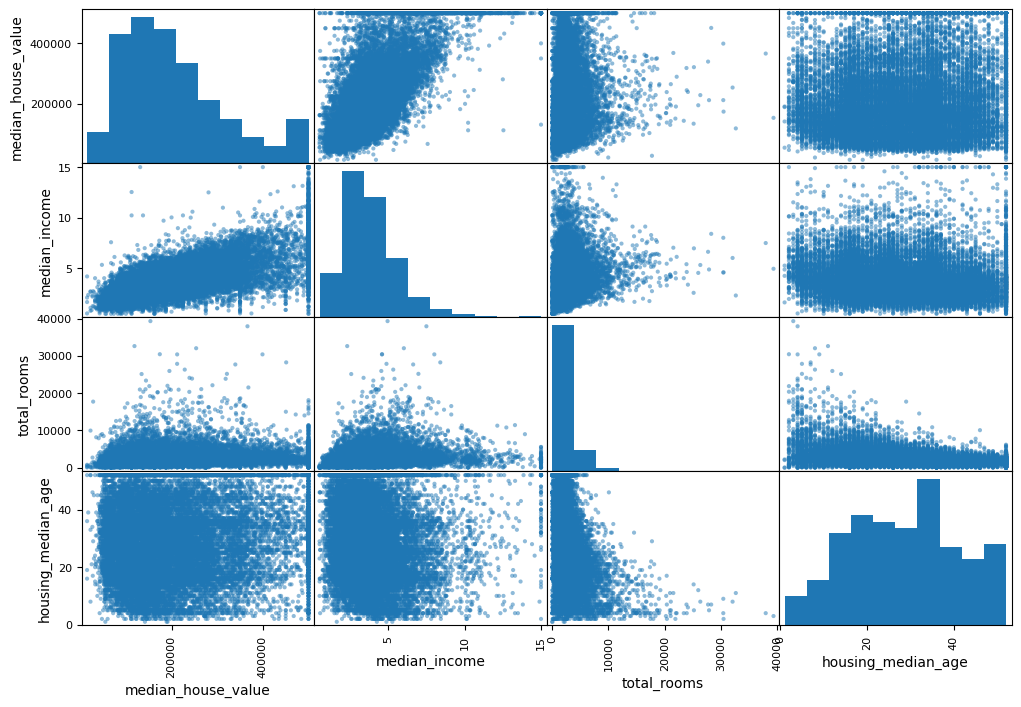

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing_df[attributes], figsize=(12, 8))


<Axes: xlabel='median_income', ylabel='median_house_value'>

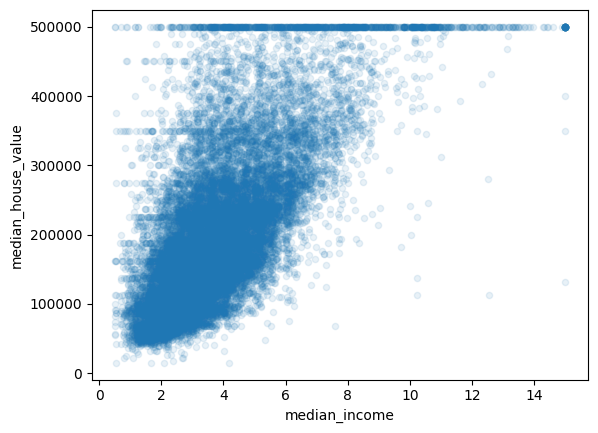

In [ ]:
# The most promising attribute to predict the median house value is the median income
housing_df.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

In [37]:
# decoding ocean proximity labels
labels_decoded = label_encoder.inverse_transform(housing_df['ocean_proximity'])
print("{")
for i,labels in enumerate(label_encoder.classes_):
    print(f"  {i} : {labels}")
print("}")

{
  0 : 0
  1 : 1
  2 : 2
  3 : 3
  4 : 4
}
